In [5]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Robot:
    
    def __init__(self, e):
        print("[Robot] Robot criado.\n")
        self.e = e
        self.state = 1
        self.reward = 0
        self.actions = ['up','down','left','right']
        self.alfa = 0.7
        self.discount = 0.99
        self.matrixQ = np.zeros((100,4))
        self.greed = 0.0
        self.goal_of_state = False
    
    def setState(self,s):
        self.state = s
    
    def reset(self):
        self.state = 1
        self.reward = 0
        self.goal_of_state = False
    
    def reset_state(self):
        self.state = 1
        self.goal_of_state = False
    
    def random_action(self):
        return self.actions[random.randint(0,3)]
    
    def end_of_episode(self):
        if(self.goal_of_state == True):
            self.reward += self.e.reward(self.state)
            self.reset_state()
            return True
        else:
            return False
        
    #Função para movimentar o robot aleatoriamente ou usando a matrizQ, e atuliza a matrizQ consoante um o booleano Update
    def walk(self, update, penalty ):
        old_state = self.state
       
        if(random.random() <= self.greed):
            #Robot utiliza a matrizQ para se movimentar
            action = self.best_action()
            self.setState(self.e.state_transition(self.state,action))
        
        else: 
            #Robot movimenta-se sem a matrizQ --> random
            action = self.random_action()
            self.setState(self.e.state_transition(old_state,action))
        
        #Ex 4
        if(penalty):
            if(update):
                self.update_matrixQ(old_state-1,self.actions.index(action) ,self.givePenalty(old_state))
        elif(update):
            self.update_matrixQ(old_state-1,self.actions.index(action),False)
        
        if(self.state == 100):         
            self.goal_of_state = True
        
    #Dá uma penalidade de -0,1 aos rewards caso o robot choque contra as paredes
    def givePenalty(self,old_state):
        if(old_state == self.setState):
            self.reward-=0.1
            return True
        else:
            return False
            
    #Atualiza a matrizQ        
    def update_matrixQ(self,s,a, penalty):
        if not penalty:
            self.matrixQ[s][a]=(1-self.alfa)*self.matrixQ[s][a]+self.alfa*(self.e.reward(self.state)+self.discount*self.max_matrixQ())
        else:
            self.matrixQ[s][a]=(1-self.alfa)*self.matrixQ[s][a]+self.alfa*(-0.1+self.discount*self.max_matrixQ())
        
    #Devolve a melhor ação do estado em que o robot se encontra
    def best_action(self):
        max_val= np.max(self.matrixQ[self.state-1])
        action = random.choice([i for i in range(len(self.matrixQ[self.state-1])) if self.matrixQ[self.state-1][i] == max_val])
        return self.actions[action]
    
    #Devolve o maximo do estado em que se encontra
    def max_matrixQ(self):
        return np.max(self.matrixQ[self.state-1])


class Environment:
    
    def __init__(self, wall):
        self.wall = wall
        if(wall):
            self.walls = [4,14,24,34,44,54,64,74,84,17,27,37,47,57,67,77,87,97]
        print("[Environment] Environment criado.")
        
        
    def state_transition(self,s,a):
        newState = s
        if(a == 'up'):
            if(s > 10):
                newState-=10
        elif(a == 'down'):
            if(s < 91):
                newState+=10
        elif(a == 'left'):
            if( s % 10 != 1):
                newState-=1
        elif(a == 'right'):
            if( s % 10 != 0):
                newState+=1
        
        if(self.wall and newState in self.walls):
            return s
        else:
            return newState
            
    def reward(self, s):
        if(s==100):
            return 100
        else:
            return 0  

In [6]:
def boxplot(steps_to_reach_goal,rewards,avg_reward_per_step,runtimes):
    d = {'Mean number of steps':steps_to_reach_goal, 'Mean rewards':rewards,'Mean Reward per Step':avg_reward_per_step,'Mean Run-times (s)':runtimes}
    df = pd.DataFrame.from_dict(d,orient='index')
    df = df.transpose()
    selection = ['Mean number of steps','Mean rewards','Mean Reward per Step','Mean Run-times (s)']
    fig, ax = plt.subplots(1, len(selection), figsize=(10,4))
    i = 0
    for col in selection:
        axo = df[col].plot(kind='box', ax=ax[i], showfliers=True)
        i += 1

    plt.tight_layout(4)
    plt.show()

# Ex 1

[Environment] Environment criado.
[Robot] Robot criado.

Test: 1  -- Average reward per step : 0.3
Test: 2  -- Average reward per step : 0.2
Test: 3  -- Average reward per step : 0.1
Test: 4  -- Average reward per step : 0.0
Test: 5  -- Average reward per step : 0.1
Test: 6  -- Average reward per step : 0.1
Test: 7  -- Average reward per step : 0.1
Test: 8  -- Average reward per step : 0.0
Test: 9  -- Average reward per step : 0.0
Test: 10  -- Average reward per step : 0.2
Test: 11  -- Average reward per step : 0.2
Test: 12  -- Average reward per step : 0.0
Test: 13  -- Average reward per step : 0.4
Test: 14  -- Average reward per step : 0.1
Test: 15  -- Average reward per step : 0.0
Test: 16  -- Average reward per step : 0.0
Test: 17  -- Average reward per step : 0.2
Test: 18  -- Average reward per step : 0.3
Test: 19  -- Average reward per step : 0.1
Test: 20  -- Average reward per step : 0.0
Test: 21  -- Average reward per step : 0.2
Test: 22  -- Average reward per step : 0.2
Test: 

<ipython-input-6-5617a4269d7e>:12: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(4)


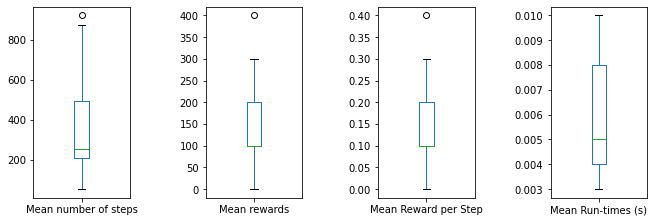

In [7]:
#Ex 1
random.seed(10)
wall = False
e  = Environment(wall)
r= Robot(e)

steps_to_reach_goal = []
runtimes = []
rewards = []
avg_reward_per_step=[]

for i in range(30):
    start = time.time()
    steps = 0

    for j in range(1000):
        steps+=1
        r.walk(False,False)

        if(r.end_of_episode()):
            steps_to_reach_goal.append(steps)
            steps=0

    end = time.time()
    runtimes.append(end-start)        
    rewards.append(r.reward)

    #Média de rewards per step
    average_reward_per_step = r.reward / 1000
    avg_reward_per_step.append(average_reward_per_step)
    print("Test:",(i+1)," -- Average reward per step :",average_reward_per_step)

    r.reset()

steps_average = np.mean(steps_to_reach_goal)
print("\nAverage steps to reach goal :",steps_average)
steps_std = np.std(steps_to_reach_goal)
print("Standard-deviation to reach goal:", steps_std)

average_reward = np.mean(rewards)
print("Average rewards:", average_reward)
reward_std = np.std(rewards)
print("Rewards standard-deviation:", reward_std)

average_runtimes =  np.mean(runtimes)
print("Average runtimes:",average_runtimes)
runtimes_std = np.std(runtimes)
print("Runtimes standard-deviation", runtimes_std)
boxplot(steps_to_reach_goal,rewards,avg_reward_per_step,runtimes)

# Ex 2

P:Can you now tell which is the best sequence of actions using the information in Q?

P:Can you now tell the best action from any given state?

R:Sim, à medida que a matriz vai sendo atualizada vai ser possível obter a melhor ação para cada estado, sendo que esta vai ser a que tem maior valor de utilidade entre as diversas ações, e consequentemente vai ser possível obter a melhor sequência de ações.

[Environment] Environment criado.
[Robot] Robot criado.

Average runtime: 0.42033207416534424
Runtimes standard-deviation 0.02612072815146583 



<ipython-input-75-5617a4269d7e>:12: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(4)


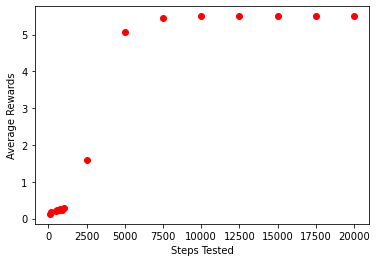

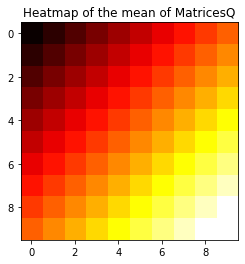

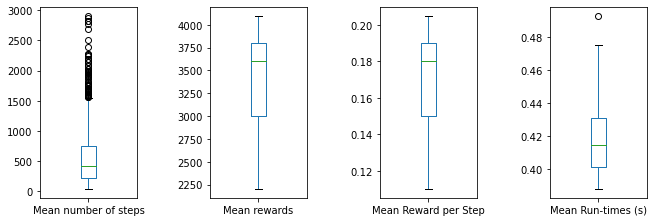

In [79]:
# Ex 2.a)
#random.seed(2)
wall = False
e  = Environment(wall)
r= Robot(e)

steps_to_reach_goal = []
runtimes = []
rewards = []
avg_reward_per_step=[]

matricesQ = []
points = [100, 200, 500, 600, 700, 800, 900, 1000, 2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000]
reward_per_step = np.zeros((16,30))
aux = 0 #Linha da matriz reward_per_step, se for 0 corresponde ao ponto 100 , 1 ->200,...
        
for i in range(30):
    start = time.time()
    steps = 0
    r.matrixQ.fill(0)

    for j in range(20000):
        steps+=1
        r.walk(True,False)
        if(r.end_of_episode()):
            steps_to_reach_goal.append(steps)
            steps = 0

        if (j+1) in points:
            old_state = r.state
            old_reward = r.reward
            old_goal_of_state = r.goal_of_state

            r.reset()
            r.greed = 1 #robot usa a matriz para se movimentar
            for l in range(1000):
                r.walk(False,False)
                r.end_of_episode()

            reward_per_step[aux][i] = r.reward/1000
            aux+=1

            r.state = old_state
            r.reward = old_reward
            r.goal_of_state = old_goal_of_state
            r.greed = 0.0 #robot nao usa a matriz para se movimentar


    end = time.time()
    runtimes.append(end-start)
    aux = 0
    average_reward_per_step = r.reward / 20000
    avg_reward_per_step.append(average_reward_per_step)
    rewards.append(r.reward)
    r.reset()
    matricesQ.append(r.matrixQ)
    


#Média e desvio padrão dos runtimes
average_runtimes =  np.mean(runtimes)
print("Average runtime:",average_runtimes)
runtimes_std = np.std(runtimes)
print("Runtimes standard-deviation", runtimes_std, "\n")


#average reward
average_reward = reward_per_step.mean(1)

plt.plot(points ,average_reward, 'ro' )
plt.ylabel('Average Rewards')
plt.xlabel('Steps Tested')

r.matrixQ = np.mean(matricesQ,  axis=0)
r.matrixQ[99]=100

z = 0
heatmap = np.zeros((10,10))
for row in range(10):
    for column in range(10):
        max_val= np.max(r.matrixQ[z])
        action = random.choice([i for i in range(len(r.matrixQ[z])) if r.matrixQ[z][i] == max_val])

        heatmap[row][column]=r.matrixQ[z][np.argmax(r.matrixQ[z])]
        z+=1
        
fig, ax = plt.subplots()
ax.set_title("Heatmap of the mean of MatricesQ")
im = ax.imshow(heatmap,cmap='hot')
plt.show

boxplot(steps_to_reach_goal,rewards,avg_reward_per_step,runtimes)


[Environment] Environment criado.
[Robot] Robot criado.

Average runtime: 0.5761880477269491
Runtimes standard-deviation 0.03276944111550639 



<ipython-input-75-5617a4269d7e>:12: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(4)


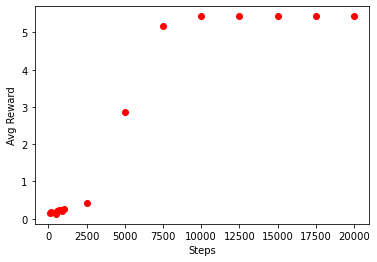

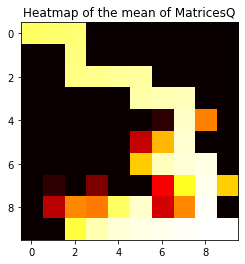

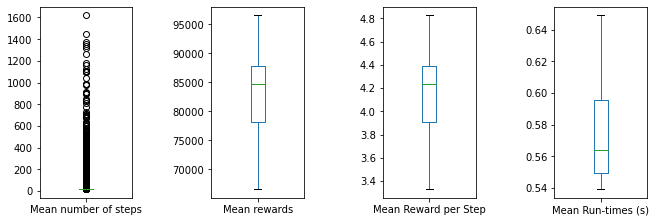

In [80]:
# Ex 2.b)

random.seed(3)
wall = False
e  = Environment(wall)
r= Robot(e)

steps_to_reach_goal = []
runtimes = []
rewards = []
avg_reward_per_step=[]

matricesQ = []
r.greed = 1 #robot usa a matriz para se movimentar
points = [100, 200, 500, 600, 700, 800, 900, 1000, 2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000]
runtimes=[]
reward_per_step = np.zeros((16,30))
aux = 0 #Linha da matriz reward_per_step, se for 0 corresponde ao ponto 100 , 1 ->200,...

        
for i in range(30):
    start = time.time()
    steps = 0
    r.matrixQ.fill(0)
            
    for j in range(20000):
        steps += 1
        r.walk(True,False)
        if(r.end_of_episode()):
            steps_to_reach_goal.append(steps) 
            steps = 0
            
        if (j+1) in points:
            old_state = r.state
            old_reward = r.reward
            old_goal_of_state = r.goal_of_state

            r.reset()
            for l in range(1000):
                r.walk(False,False) 
                r.end_of_episode()

            reward_per_step[aux][i] = r.reward/1000
            aux+=1

            r.state = old_state
            r.reward = old_reward
            r.goal_of_state = old_goal_of_state
    
    
        
    
    end = time.time()
    runtimes.append(end-start)
    aux = 0
    average_reward_per_step = r.reward / 20000
    avg_reward_per_step.append(average_reward_per_step)
    rewards.append(r.reward)
    matricesQ.append(r.matrixQ)
    r.reset()

#Média e desvio padrão dos runtimes
average_runtimes =  np.mean(runtimes)
print("Average runtime:",average_runtimes)
runtimes_std = np.std(runtimes)
print("Runtimes standard-deviation", runtimes_std, "\n")


#average reward
average_reward = reward_per_step.mean(1)
plt.plot(points ,average_reward , 'ro')
plt.ylabel('Avg Reward')
plt.xlabel('Steps')



r.matrixQ = np.mean(matricesQ,  axis=0)
r.matrixQ[99]=100

z = 0
heatmap = np.zeros((10,10))
for row in range(10):
    for column in range(10):
        max_val= np.max(r.matrixQ[z])
        action = random.choice([i for i in range(len(r.matrixQ[z])) if r.matrixQ[z][i] == max_val])

        heatmap[row][column]=r.matrixQ[z][np.argmax(r.matrixQ[z])]
        z+=1
fig, ax = plt.subplots()
ax.set_title("Heatmap of the mean of MatricesQ")
im = ax.imshow(heatmap,cmap='hot')
plt.show
boxplot(steps_to_reach_goal,rewards,avg_reward_per_step,runtimes)

R:No 2.a) é possível observar que o robô não estabeleceu nenhum caminho específico obtendo-se assim um heatmap com um gradiente de cores, enquanto no 2.b com os update à matrizQ e escolhendo sempre a melhor ação, foi possível vizualizar que este aprendeu um dos caminho mais rápido para o objetivo.  

# EX 3

[Environment] Environment criado.
[Robot] Robot criado.



<ipython-input-6-5617a4269d7e>:12: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(4)


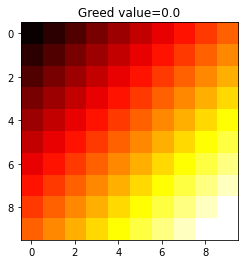

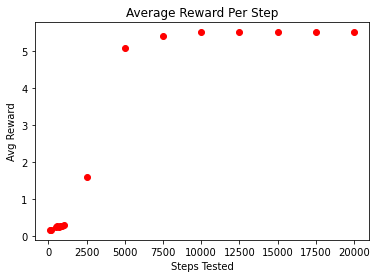

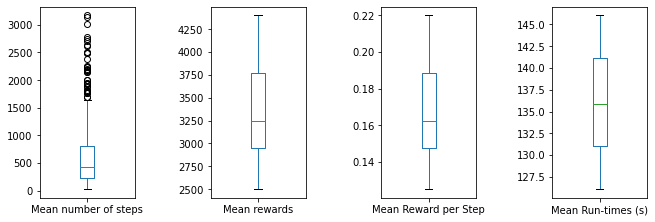

<ipython-input-6-5617a4269d7e>:12: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(4)


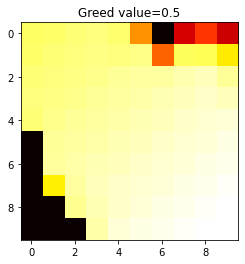

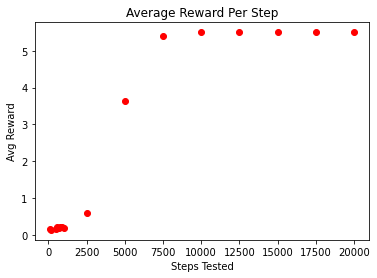

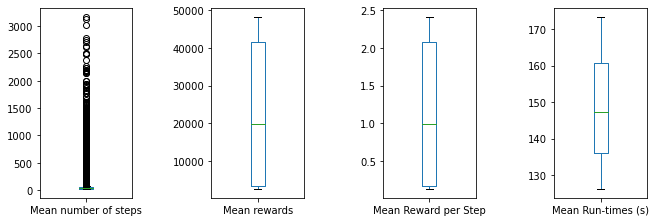

<ipython-input-6-5617a4269d7e>:12: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(4)


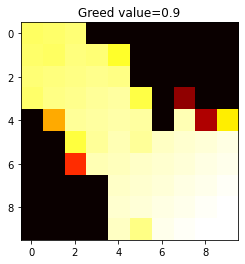

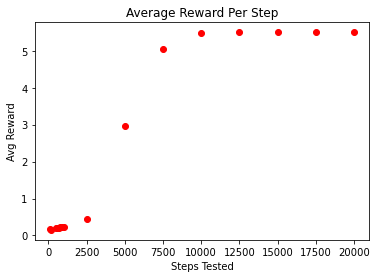

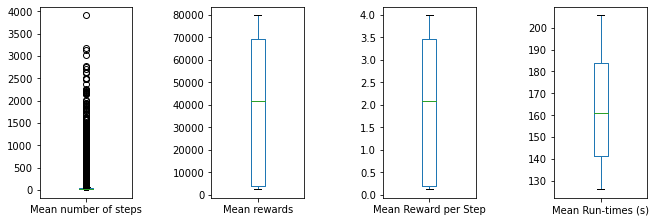

<ipython-input-6-5617a4269d7e>:12: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(4)


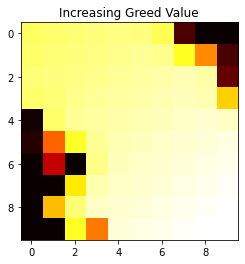

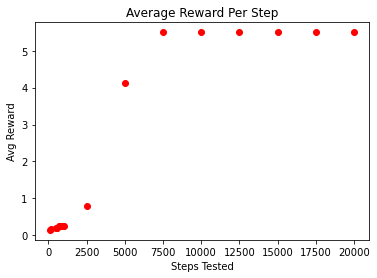

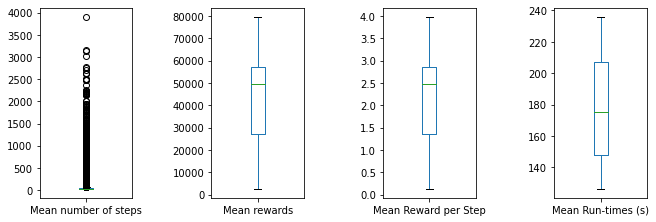

Average runtime: 177.96979421973228
Runtimes standard-deviation 33.61612592162332 



In [19]:
#Ex 3
random.seed(7)
wall = False
e  = Environment(wall)
r = Robot(e)

steps_to_reach_goal = []
runtimes = []
rewards = []
avg_reward_per_step=[]


matricesQ = []
greed_values = [0.0 , 0.5 , 0.9,0.3]
points = [100, 200, 500, 600, 700, 800, 900, 1000, 2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000]
reward_per_step = np.zeros((16,30))
aux = 0 #Linha da matriz reward_per_step, se for 0 corresponde ao ponto 100 , 1 ->200,...
increment = 1/20000
increase = False

for i in range(4):
    matricesQ = []
    for m in range(30):
        r.matrixQ.fill(0)
        steps = 0
        r.greed = greed_values[i]
        if(i == 3):
            increase = True

        for j in range(20000):
            steps+=1
            if(increase):
                if(j < 20000*0.3):
                    r.walk(True,False)
                    if(r.end_of_episode()):
                        steps_to_reach_goal.append(steps)
                        steps = 0
                else:
                    r.greed += increment
                    r.walk(True,False)
                    if(r.end_of_episode()):
                        steps_to_reach_goal.append(steps)
                        steps = 0
            else:
                r.walk(True,False)
                if(r.end_of_episode()):
                        steps_to_reach_goal.append(steps)
                        steps = 0

            if(j+1) in points:
                old_greed = r.greed 
                old_state = r.state
                old_reward = r.reward
                old_goal_of_state = r.goal_of_state
                r.reset()
                r.greed = 1

                for l in range(1000):
                    r.walk(False,False)
                    r.end_of_episode()
               
                reward_per_step[aux][m] = r.reward/1000
                aux+=1
                
                r.greed = old_greed
                r.state = old_state
                r.reward = old_reward
                r.goal_of_state = old_goal_of_state


        aux = 0
        matricesQ.append(r.matrixQ)
        rewards.append(r.reward)
        avg_reward_per_step.append(r.reward/20000)
        r.reset()
        end = time.time()
        runtimes.append(end-start)
    
    r.matrixQ = np.mean(matricesQ,  axis=0)
    r.matrixQ[99] = 100    
        
    z = 0
    heatmap = np.zeros((10,10))
    for row in range(10):
        for column in range(10):
            max_val= np.max(r.matrixQ[z])
            action = random.choice([i for i in range(len(r.matrixQ[z])) if r.matrixQ[z][i] == max_val])

            heatmap[row][column]=r.matrixQ[z][np.argmax(r.matrixQ[z])]
            z+=1
    fig, ax = plt.subplots()
    
    
    if(i<3):
        title = "Greed value=" + str(greed_values[i])
    else:
        title = "Increasing Greed Value"
    ax.set_title(title)
    im = ax.imshow(heatmap,cmap='hot')
    
    #average reward
    fig, ax1 = plt.subplots()
    average_reward = reward_per_step.mean(1)
    reward_per_step.fill(0)
    ax1.plot(points ,average_reward,'ro' )
    ax1.set_title("Average Reward Per Step")
    plt.ylabel('Avg Reward')
    plt.xlabel('Steps Tested') 
    plt.show
    
    boxplot(steps_to_reach_goal,rewards,avg_reward_per_step,runtimes)
    

#Média e desvio padrão dos runtimes
average_runtimes =  np.mean(runtimes)
print("Average runtime:",average_runtimes)
runtimes_std = np.std(runtimes)
print("Runtimes standard-deviation", runtimes_std, "\n")

R:Ao implementarmos o atributo "greed" no robô, consoante o valor deste o robô irá possuir dois comportamentos, exploit e exploration, ou seja com um greed elevado este irá prevalecer o comportamento exploit e com um greed menor este irá prevalecer o comportamento de exploration.

# Ex 4

[Environment] Environment criado.
[Robot] Robot criado.

Average runtime: 0.780638861656189
Runtimes standard-deviation 0.1032882071456494 



<ipython-input-6-5617a4269d7e>:12: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(4)


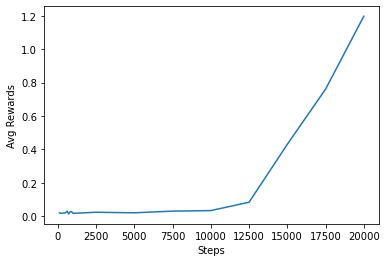

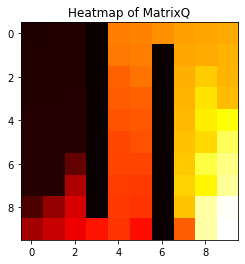

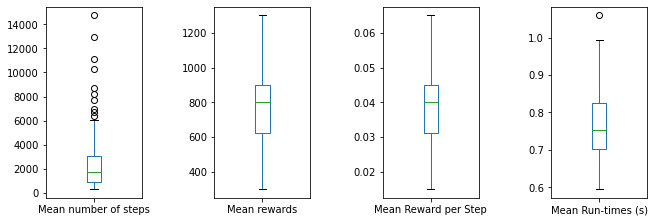

In [38]:
#Ex4 ---> Ex2.a)
random.seed(10)
wall = True
e  = Environment(wall)
r= Robot(e)

steps_to_reach_goal = []
runtimes = []
rewards = []
avg_reward_per_step=[]

matricesQ = []
points = [100, 200, 500, 600, 700, 800, 900, 1000, 2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000]
reward_per_step = np.zeros((16,30))
aux = 0 #Linha da matriz reward_per_step, se for 0 corresponde ao ponto 100 , 1 ->200,...
        
for i in range(30):
    start = time.time()
    r.matrixQ.fill(0)
    steps = 0

    for j in range(20000):
        steps += 1 
        r.walk(True,True)
        if(r.end_of_episode()):
            steps_to_reach_goal.append(steps)
            steps = 0

        if (j+1) in points:
            old_state = r.state
            old_reward = r.reward
            old_goal_of_state = r.goal_of_state

            r.reset()
            r.greed = 1 #robot usa a matriz para se movimentar
            for l in range(1000):
                r.walk(False,True)
                r.end_of_episode()

            reward_per_step[aux][i] = r.reward/1000
            aux+=1

            r.state = old_state
            r.reward = old_reward
            r.goal_of_state = old_goal_of_state
            r.greed = 0.0 #robot nao usa a matriz para se movimentar


    end = time.time()
    runtimes.append(end-start)
    aux = 0
    rewards.append(r.reward)
    average_reward_per_step = r.reward / 20000
    avg_reward_per_step.append(average_reward_per_step)
    r.reset()
    matricesQ.append(r.matrixQ)
    


#Média e desvio padrão dos runtimes
average_runtimes =  np.mean(runtimes)
print("Average runtime:",average_runtimes)
runtimes_std = np.std(runtimes)
print("Runtimes standard-deviation", runtimes_std, "\n")


#average reward
average_reward = reward_per_step.mean(1)

plt.plot(points ,average_reward )
plt.ylabel('Avg Rewards')
plt.xlabel('Steps')


r.matrixQ = np.mean(matricesQ,  axis=0)
r.matrixQ[99]=100

z = 0
heatmap = np.zeros((10,10))
for row in range(10):
    for column in range(10):
        max_val= np.max(r.matrixQ[z])
        action = random.choice([i for i in range(len(r.matrixQ[z])) if r.matrixQ[z][i] == max_val])

        heatmap[row][column]=r.matrixQ[z][np.argmax(r.matrixQ[z])]
        z+=1
        
fig, ax = plt.subplots()
ax.set_title("Heatmap of MatrixQ")
im = ax.imshow(heatmap,cmap='hot')
plt.show

boxplot(steps_to_reach_goal,rewards,avg_reward_per_step,runtimes)

[Environment] Environment criado.
[Robot] Robot criado.

Average runtime: 4.417540884017944
Runtimes standard-deviation 0.2911523953338032 



<ipython-input-6-5617a4269d7e>:12: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(4)


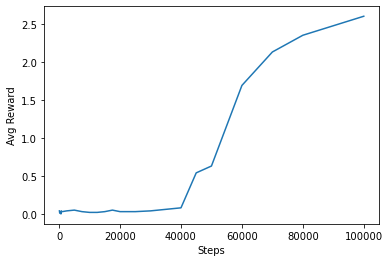

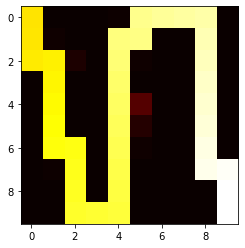

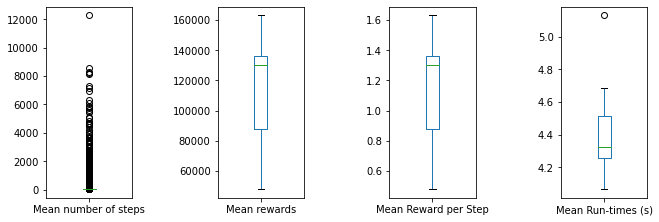

In [39]:
random.seed(10)
wall = True
e  = Environment(wall)
r= Robot(e)

steps_to_reach_goal = []
runtimes = []
rewards = []
avg_reward_per_step=[]

matricesQ = []
r.greed = 1 #robot usa a matriz para se movimentar
points = [100, 200, 500, 600, 700, 800, 900, 1000, 2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000,25000,30000,40000,45000,50000,60000,70000,80000,99999]
reward_per_step = np.zeros((25,10))
aux = 0 #Linha da matriz reward_per_step, se for 0 corresponde ao ponto 100 , 1 ->200,...
        
for i in range(10):
    start = time.time() 
    r.matrixQ.fill(0)
    steps = 0        
    for j in range(100000):
        steps+=1
        r.walk(True,True)
        if(r.end_of_episode()):
            steps_to_reach_goal.append(steps)
            steps = 0
            
        if (j+1) in points:
            old_state = r.state
            old_reward = r.reward
            old_goal_of_state = r.goal_of_state

            r.reset()
            for l in range(1000):
                r.walk(False,True) 
                r.end_of_episode()

            reward_per_step[aux][i] = r.reward/1000
            aux+=1

            r.state = old_state
            r.reward = old_reward
            r.goal_of_state = old_goal_of_state
    
    end = time.time()
    runtimes.append(end-start)
    rewards.append(r.reward)
    average_reward_per_step = r.reward / 100000
    avg_reward_per_step.append(average_reward_per_step)
    aux = 0
    matricesQ.append(r.matrixQ)
    r.reset()

#Média e desvio padrão dos runtimes
average_runtimes =  np.mean(runtimes)
print("Average runtime:",average_runtimes)
runtimes_std = np.std(runtimes)
print("Runtimes standard-deviation", runtimes_std, "\n")


#average reward
average_reward = reward_per_step.mean(1)
plt.plot(points ,average_reward )
plt.ylabel('Avg Reward')
plt.xlabel('Steps')



r.matrixQ = np.mean(matricesQ,  axis=0)
r.matrixQ[99]=100

z = 0
heatmap = np.zeros((10,10))
for row in range(10):
    for column in range(10):
        max_val= np.max(r.matrixQ[z])
        action = random.choice([i for i in range(len(r.matrixQ[z])) if r.matrixQ[z][i] == max_val])

        heatmap[row][column]=r.matrixQ[z][np.argmax(r.matrixQ[z])]
        z+=1
fig, ax = plt.subplots()
im = ax.imshow(heatmap,cmap='hot')
plt.show

boxplot(steps_to_reach_goal,rewards,avg_reward_per_step,runtimes)

[Environment] Environment criado.
[Robot] Robot criado.



<ipython-input-6-5617a4269d7e>:12: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(4)


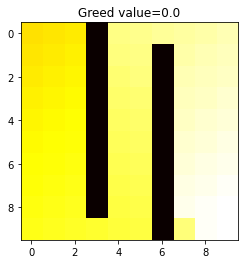

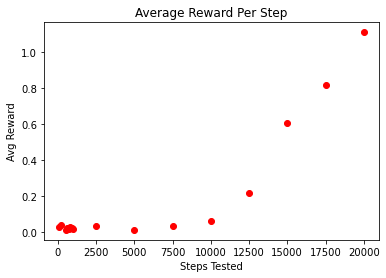

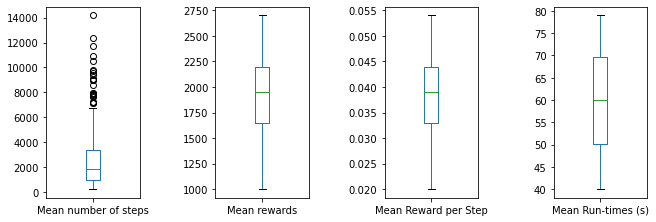

<ipython-input-6-5617a4269d7e>:12: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(4)


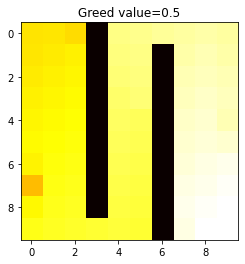

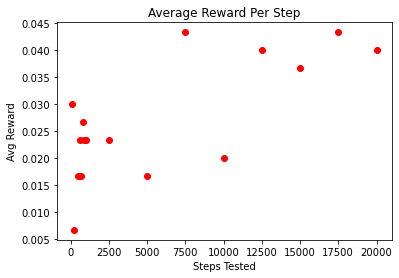

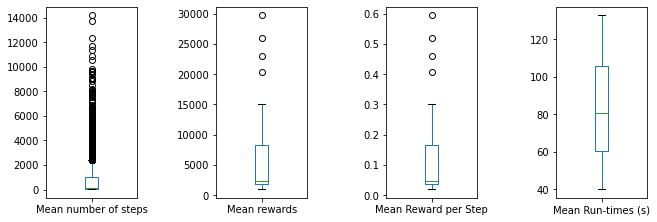

<ipython-input-6-5617a4269d7e>:12: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(4)


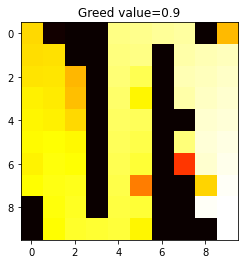

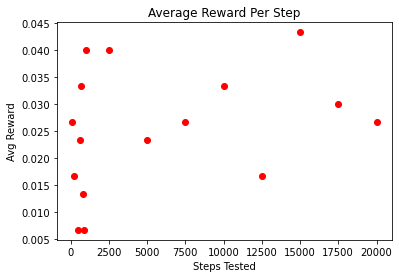

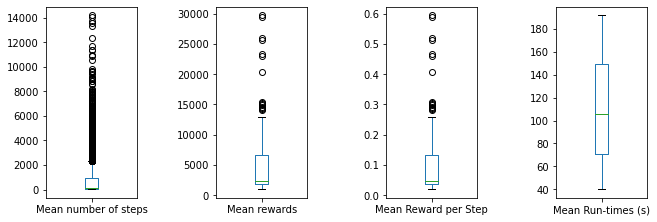

<ipython-input-6-5617a4269d7e>:12: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(4)


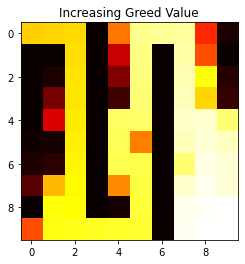

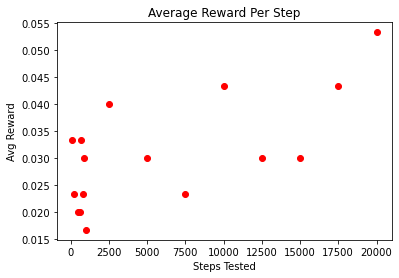

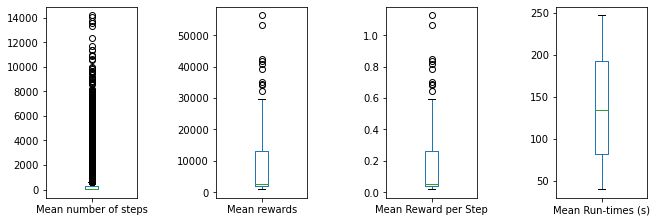

Average runtime: 137.96293877959252
Runtimes standard-deviation 62.219932164102 



In [40]:
#Ex4   ---> Ex3
random.seed(7)
wall = True
e  = Environment(wall)
r = Robot(e)

steps_to_reach_goal = []
runtimes = []
rewards = []
avg_reward_per_step=[]


matricesQ = []
greed_values = [0.0 , 0.5 , 0.9,0.3]
points = [100, 200, 500, 600, 700, 800, 900, 1000, 2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000]
reward_per_step = np.zeros((16,30))
aux = 0 #Linha da matriz reward_per_step, se for 0 corresponde ao ponto 100 , 1 ->200,...
increment = 1/50000
increase = False

for i in range(4):
    matricesQ = []
    for m in range(30):
        r.matrixQ.fill(0)
        steps = 0
        r.greed = greed_values[i]
        if(i == 3):
            increase = True

        for j in range(50000):
            steps+=1
            if(increase):
                if(j < 50000*0.3):
                    r.walk(True,True)
                    if(r.end_of_episode()):
                        steps_to_reach_goal.append(steps)
                        steps = 0
                else:
                    r.greed += increment
                    r.walk(True,True)
                    if(r.end_of_episode()):
                        steps_to_reach_goal.append(steps)
                        steps = 0
            else:
                r.walk(True,True)
                if(r.end_of_episode()):
                        steps_to_reach_goal.append(steps)
                        steps = 0

            if(j+1) in points:
                old_greed = r.greed 
                old_state = r.state
                old_reward = r.reward
                old_goal_of_state = r.goal_of_state
                r.reset()
                r.greed = 1

                for l in range(1000):
                    r.walk(False,True)
                    r.end_of_episode()
               
                reward_per_step[aux][m] = r.reward/1000
                aux+=1
                
                r.greed = old_greed
                r.state = old_state
                r.reward = old_reward
                r.goal_of_state = old_goal_of_state


        aux = 0
        matricesQ.append(r.matrixQ)
        rewards.append(r.reward)
        avg_reward_per_step.append(r.reward/50000)
        r.reset()
        end = time.time()
        runtimes.append(end-start)
    
    r.matrixQ = np.mean(matricesQ,  axis=0)
    r.matrixQ[99] = 100    
        
    z = 0
    heatmap = np.zeros((10,10))
    for row in range(10):
        for column in range(10):
            max_val= np.max(r.matrixQ[z])
            action = random.choice([i for i in range(len(r.matrixQ[z])) if r.matrixQ[z][i] == max_val])

            heatmap[row][column]=r.matrixQ[z][np.argmax(r.matrixQ[z])]
            z+=1
    fig, ax = plt.subplots()
    
    
    if(i<3):
        title = "Greed value=" + str(greed_values[i])
    else:
        title = "Increasing Greed Value"
    ax.set_title(title)
    im = ax.imshow(heatmap,cmap='hot')
    
    #average reward
    fig, ax1 = plt.subplots()
    average_reward = reward_per_step.mean(1)
    reward_per_step.fill(0)
    ax1.plot(points ,average_reward,'ro' )
    ax1.set_title("Average Reward Per Step")
    plt.ylabel('Avg Reward')
    plt.xlabel('Steps Tested') 
    plt.show
    
    boxplot(steps_to_reach_goal,rewards,avg_reward_per_step,runtimes)
    

#Média e desvio padrão dos runtimes
average_runtimes =  np.mean(runtimes)
print("Average runtime:",average_runtimes)
runtimes_std = np.std(runtimes)
print("Runtimes standard-deviation", runtimes_std, "\n")

R:Com a implementação da paredes e da penalidade, o robô teve mais dificuldade em encontrar o melhor, verificando-se assim também um corte no average reward para metade (de 2,5 para valores à volta de 1,25), assim como o aumento do runtime, para além disto ao executar o teste do 2.b para o exercício 4, foi possivel verificar que o robô necessitou de mais passos para descobrir o caminho ideal.